In [1]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.ion()
import numpy as np

In [2]:
# Hyper Parameters
EPOCH = 15
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = True
N_TEST_IMG = 15

INPUT_SHAPE = 28*28
LAYER_1_OUT_SHAPE = 12
LAYER_2_OUT_SHAPE = 3


torch.Size([60000, 28, 28])
torch.Size([60000])


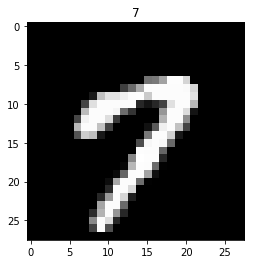

In [3]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[N_TEST_IMG].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[N_TEST_IMG])
plt.show()

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

In [4]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(INPUT_SHAPE, LAYER_1_OUT_SHAPE),
            nn.Tanh(),
            nn.Linear(LAYER_1_OUT_SHAPE, LAYER_2_OUT_SHAPE),
#             nn.Linear(28*28, 128),
#             nn.Tanh(),
#             nn.Linear(128, 64),
#             nn.Tanh(),
#             nn.Linear(64, 12),
#             nn.Tanh(),
#             nn.Linear(12, 3),   # compress to 3 features which can be visualized in plt
        )
        self.decoder = nn.Sequential(
            nn.Linear(LAYER_2_OUT_SHAPE, LAYER_1_OUT_SHAPE),
            nn.Tanh(),
            nn.Linear(LAYER_1_OUT_SHAPE, INPUT_SHAPE),
            nn.Sigmoid(),
#             nn.Linear(3, 12),
#             nn.Tanh(),
#             nn.Linear(12, 64),
#             nn.Tanh(),
#             nn.Linear(64, 128),
#             nn.Tanh(),
#             nn.Linear(128, 28*28),
#             nn.Sigmoid(),       # compress to a range (0, 1)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


autoencoder = AutoEncoder()

In [5]:
print(autoencoder)

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): Tanh()
    (2): Linear(in_features=12, out_features=784, bias=True)
    (3): Sigmoid()
  )
)


In [6]:
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

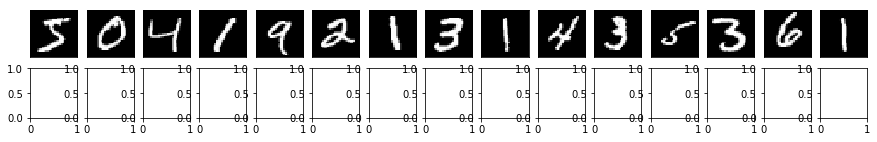

In [13]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(15, 2))

# Since the continuous plotting doesnt seem to work in the notebook just plot the original data
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())

In [14]:
losses = []
epoch_costs = []

In [15]:
for epoch in range(EPOCH):
    running_loss = 0.0
    num_minibatches = int(train_data.train_labels.size()[0] / BATCH_SIZE)
    for step, (x, b_label) in enumerate(train_loader):
        b_x = x.view(-1, 28*28)   # batch x, shape (batch, 28*28)
        b_y = x.view(-1, 28*28)   # batch y, shape (batch, 28*28)
        
        # Pass in x to the encoder and return both the encoded and decoded data
        encoded, decoded = autoencoder(b_x)
    
        # then compare the decoded data with the original data ... MSE loss here
        loss = loss_func(decoded, b_y)      # mean square error
        optimizer.zero_grad()               # clear gradients for this training step
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()                    # apply gradients
        
        l = loss.item()
        losses.append(l)
        running_loss += l
        

        if step % 200 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())
        if step == num_minibatches:
            epoch_costs.append(running_loss / num_minibatches)
            #print('Epoch %d: %5f' % (epoch, running_loss / num_minibatches))
            running_loss = 0.        

plt.show()



Epoch:  0 | train loss: 0.2344
Epoch:  0 | train loss: 0.0654
Epoch:  0 | train loss: 0.0647
Epoch:  0 | train loss: 0.0674
Epoch:  0 | train loss: 0.0661
Epoch:  1 | train loss: 0.0655
Epoch:  1 | train loss: 0.0681
Epoch:  1 | train loss: 0.0679
Epoch:  1 | train loss: 0.0652
Epoch:  1 | train loss: 0.0703
Epoch:  2 | train loss: 0.0689
Epoch:  2 | train loss: 0.0655
Epoch:  2 | train loss: 0.0694
Epoch:  2 | train loss: 0.0677
Epoch:  2 | train loss: 0.0659
Epoch:  3 | train loss: 0.0675
Epoch:  3 | train loss: 0.0712
Epoch:  3 | train loss: 0.0646
Epoch:  3 | train loss: 0.0647
Epoch:  3 | train loss: 0.0673
Epoch:  4 | train loss: 0.0702
Epoch:  4 | train loss: 0.0635
Epoch:  4 | train loss: 0.0664
Epoch:  4 | train loss: 0.0657
Epoch:  4 | train loss: 0.0662
Epoch:  5 | train loss: 0.0653
Epoch:  5 | train loss: 0.0683
Epoch:  5 | train loss: 0.0695
Epoch:  5 | train loss: 0.0679
Epoch:  5 | train loss: 0.0679
Epoch:  6 | train loss: 0.0694
Epoch:  6 | train loss: 0.0675
Epoch:  

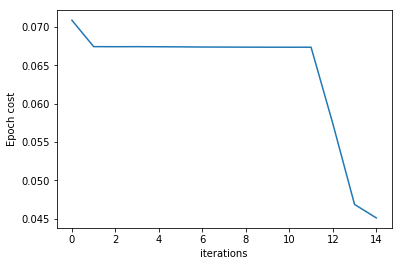

In [16]:
# then plot the average cost per epoch
plt.plot(np.squeeze(epoch_costs))
plt.ylabel('Epoch cost')
plt.xlabel('iterations')
plt.show()

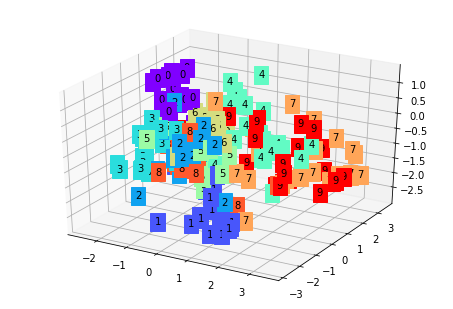

In [17]:
# visualize in 3D plot
# 
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); 
ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); 
    ax.text(x, y, z, s, backgroundcolor=c)
    ax.set_xlim(X.min(), X.max()); 
    ax.set_ylim(Y.min(), Y.max()); 
    ax.set_zlim(Z.min(), Z.max())
plt.show()

In [18]:
# get the weight of the first layer in the encoder which looks like :
# Sequential(
#  (0): Linear(in_features=784, out_features=12, bias=True)
#  (1): Tanh()
#  (2): Linear(in_features=12, out_features=3, bias=True)
#)
autoencoder.encoder#[0].weight.data.numpy()

Sequential(
  (0): Linear(in_features=784, out_features=12, bias=True)
  (1): Tanh()
  (2): Linear(in_features=12, out_features=3, bias=True)
)

In [19]:
# run the sample data throguh
encodeds, decodeds = autoencoder(view_data)
encodeds

tensor([[-0.3890, -1.7281,  0.2191],
        [-0.4699, -1.1796,  1.0023],
        [-0.4480,  2.2263,  0.1165],
        [ 0.8377, -2.4502, -2.0094],
        [ 1.4476,  2.3467, -1.1940],
        [ 0.8116, -2.0842, -0.1674],
        [-0.5170,  0.2661, -2.3587],
        [-0.0488, -2.3055,  0.0733],
        [-0.1696,  0.2009, -2.2398],
        [ 1.8460,  0.5671, -0.5909],
        [-0.6314, -2.3251, -0.8257],
        [ 0.5013, -1.8093, -0.8134],
        [-2.5166, -1.3303, -1.3495],
        [ 0.7276, -0.6265,  0.2226],
        [-0.1002, -0.0365, -2.5102],
        [ 3.4865,  1.7366, -1.5577],
        [ 0.2384, -1.7109,  0.0252],
        [ 1.0281, -2.1547, -0.5989],
        [-0.2625, -0.6772, -0.3604],
        [ 2.1612,  0.0244, -1.4747],
        [-0.6695,  2.3516,  0.2927],
        [-0.4101, -1.2014,  1.0733],
        [ 1.2566, -0.4508, -0.8401],
        [ 0.8610, -2.3904, -2.1141],
        [ 0.2176, -1.2745, -0.4895],
        [-0.4426, -2.5525, -0.7097],
        [ 0.8748,  1.3497, -1.3913],
 

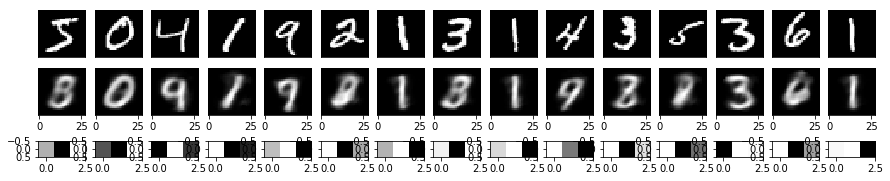

In [21]:
# Print the decoded image of against the original data
# initialize figure
f, a = plt.subplots(3, N_TEST_IMG, figsize=(15, 3))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(255*view_data.data.numpy()[i], 
                              (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    a[1][i].imshow(np.reshape(255*decodeds.data.numpy()[i], 
                              (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[1][i].set_yticks(())
    a[2][i].imshow(np.reshape(255*encodeds.data.numpy()[i], 
                              (1, 3)), cmap='gray'); a[0][i].set_xticks(()); a[1][i].set_yticks(())